In [42]:
import pandas as pd
#import umap
#import umap.plot
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [43]:
df_places = pd.read_csv('../crawling-and-preprocessing/content/data_prep_2805_3.csv', usecols=['place', 'singular_nouns'])
#df_places = pd.read_csv('../crawling-and-preprocessing/content/data_prep_2805_3.csv', usecols=['non_NE_tags'])
df_places['singular_nouns'] = df_places['singular_nouns'].apply(literal_eval)
#df_places['non_NE_nouns'] = df_places['non_NE_tags'].apply(literal_eval)
df_places['singular_nouns']

0     [Swamp, Mile, Downtown, Island, City, Canal, S...
1     [Folklore, Film, Hearsay, Key, Mile, Chain, Is...
2     [Park, Yellowstone, National, Park, Visitor, Y...
3     [Island, Island, Room, Population, Town, Perso...
4     [Hill, Grassland, Great, Home, Adventurer, Art...
                            ...                        
95    [Europa, Mountain, Favourite, Walker, Trekker,...
96    [City, Population, Resort, Transport, Connecti...
97    [Place, City, South, Population, Workforce, Cl...
98    [Catalan, Island, Exces, Score, Cove, Beach, P...
99    [Costum, Blanca, White, Coast, Beach, Coast, E...
Name: singular_nouns, Length: 100, dtype: object

In [44]:
df_places['cleaned_text'] = [' '.join(map(str, l)) for l in df_places['singular_nouns']]
df_places['cleaned_text'] = df_places['cleaned_text'].map(lambda x: x.lower())
df_places

,place,singular_nouns,cleaned_text
0,Waikiki,"[Swamp, Mile, Downtown, Island, City, Canal, S...",swamp mile downtown island city canal site day...
1,The Florida Keys,"[Folklore, Film, Hearsay, Key, Mile, Chain, Is...",folklore film hearsay key mile chain island mi...
2,Yellowstone National Park,"[Park, Yellowstone, National, Park, Visitor, Y...",park yellowstone national park visitor year pe...
3,The Big Island,"[Island, Island, Room, Population, Town, Perso...",island island room population town person capt...
4,The Great Plains,"[Hill, Grassland, Great, Home, Adventurer, Art...",hill grassland great home adventurer artist ou...
...,...,...,...
95,Picos de Europa,"[Europa, Mountain, Favourite, Walker, Trekker,...",europa mountain favourite walker trekker climb...
96,Santander,"[City, Population, Resort, Transport, Connecti...",city population resort transport connection se...
97,Malaga,"[Place, City, South, Population, Workforce, Cl...",place city south population workforce cluster ...
98,Ibiza,"[Catalan, Island, Exces, Score, Cove, Beach, P...",catalan island exces score cove beach pine for...


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df_places['cleaned_text'].values)
bow.shape

(100, 8080)

In [46]:
terms = count_vect.get_feature_names()
terms[1:10]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aalsuppe',
 'abalone',
 'abattoir',
 'abbaye',
 'abbey',
 'abduction',
 'ability',
 'abolition',
 'abortion']

In [47]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [48]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [49]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.31330610630338396

In [50]:
# Giving Labels/assigning a cluster to each point/text
#df_places = final
df_places['label'] = model.labels_ # the last column you can see the label numebers
df_places.head(20)

,place,singular_nouns,cleaned_text,label
0,Waikiki,"[Swamp, Mile, Downtown, Island, City, Canal, S...",swamp mile downtown island city canal site day...,8
1,The Florida Keys,"[Folklore, Film, Hearsay, Key, Mile, Chain, Is...",folklore film hearsay key mile chain island mi...,8
2,Yellowstone National Park,"[Park, Yellowstone, National, Park, Visitor, Y...",park yellowstone national park visitor year pe...,8
3,The Big Island,"[Island, Island, Room, Population, Town, Perso...",island island room population town person capt...,8
4,The Great Plains,"[Hill, Grassland, Great, Home, Adventurer, Art...",hill grassland great home adventurer artist ou...,8
5,The Rockies,"[Rocky, Mountain, State, Size, American, West,...",rocky mountain state size american west home m...,8
6,Santa Fe,"[City, Santum, Adventurer, Missionary, Decade,...",city santum adventurer missionary decade pilgr...,8
7,The Capital Region,"[City, District, Columbium, State, West, Capit...",city district columbium state west capital reg...,8
8,Monument Valley,"[Landscape, Sandstone, Butte, Pinnacle, Rock, ...",landscape sandstone butte pinnacle rock expans...,8
9,Zion National Park,"[Cliff, Forest, Waterfall, Zion, National, Par...",cliff forest waterfall zion national park park...,8


In [51]:
# How many points belong to each cluster -> using group by in pandas
df_places.groupby(['label'])['singular_nouns'].count()

label
0     2
1     8
2     3
3     1
4    13
5     1
6     2
7     1
8    68
9     1
Name: singular_nouns, dtype: int64

In [52]:
#Refrence credit - to find the top 10 features of cluster centriod
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: lake
 trail
 valley
 park
 fall
 ascent
 pas
 walk
 louise
 hike
Cluster 1: town
 region
 village
 valley
 place
 century
 beach
 mountain
 city
 area
Cluster 2: town
 site
 city
 village
 place
 century
 island
 time
 area
 ruin
Cluster 3: river
 boat
 forest
 hammock
 town
 water
 world
 state
 region
 trip
Cluster 4: city
 century
 centre
 street
 area
 building
 year
 place
 island
 town
Cluster 5: city
 pyramid
 place
 building
 centre
 area
 site
 year
 house
 temple
Cluster 6: city
 building
 museum
 century
 bar
 year
 street
 restaurant
 collection
 work
Cluster 7: city
 bar
 place
 capital
 street
 mayor
 terraza
 market
 year
 century
Cluster 8: town
 city
 beach
 century
 place
 park
 lake
 year
 village
 road
Cluster 9: city
 beach
 school
 favela
 samba
 street
 ball
 mountain
 place
 procession


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


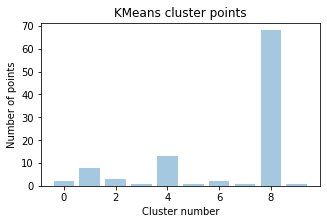

In [53]:
# visually how points or reviews are distributed across 10 clusters
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df_places.groupby(['label'])['cleaned_text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [54]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df_places['cleaned_text'].values)
tfidf.shape

(100, 8080)

In [55]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=10, random_state=99)

In [56]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [57]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.016148858503685682

In [58]:
df_places['tf_label'] = model_tf.labels_
df_places.head(5)

,place,singular_nouns,cleaned_text,label,tf_label
0,Waikiki,"[Swamp, Mile, Downtown, Island, City, Canal, S...",swamp mile downtown island city canal site day...,8,2
1,The Florida Keys,"[Folklore, Film, Hearsay, Key, Mile, Chain, Is...",folklore film hearsay key mile chain island mi...,8,9
2,Yellowstone National Park,"[Park, Yellowstone, National, Park, Visitor, Y...",park yellowstone national park visitor year pe...,8,2
3,The Big Island,"[Island, Island, Room, Population, Town, Perso...",island island room population town person capt...,8,2
4,The Great Plains,"[Hill, Grassland, Great, Home, Adventurer, Art...",hill grassland great home adventurer artist ou...,8,6


In [59]:
df_places.groupby(['tf_label'])['cleaned_text'].count()

tf_label
0     2
1     8
2     5
3     6
4    12
5    14
6    13
7    29
8     5
9     6
Name: cleaned_text, dtype: int64

In [60]:
#Refrence credit - to find the top 10 features of cluster centriod
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: reserve
 species
 beach
 cenote
 peninsula
 cave
 bird
 desert
 diving
 sian
Cluster 1: city
 market
 town
 plaza
 state
 jungle
 site
 centre
 independencium
 festival
Cluster 2: volcano
 island
 lava
 crater
 eruption
 mile
 park
 aeolian
 caldera
 outrigger
Cluster 3: whale
 beach
 island
 smeralda
 port
 costum
 lawrence
 watching
 city
 area
Cluster 4: lake
 park
 trail
 town
 hike
 lagoon
 valley
 canyon
 ascent
 village
Cluster 5: valley
 town
 mountain
 village
 century
 canyon
 region
 hike
 hut
 trail
Cluster 6: town
 beach
 state
 city
 chapada
 coast
 river
 paulo
 region
 hill
Cluster 7: city
 century
 building
 street
 museum
 palace
 place
 year
 centre
 world
Cluster 8: inca
 citadel
 plaza
 valley
 route
 cotton
 ruin
 sacred
 carman
 city
Cluster 9: beach
 island
 bar
 buggy
 sant
 sand
 cala
 coast
 water
 town


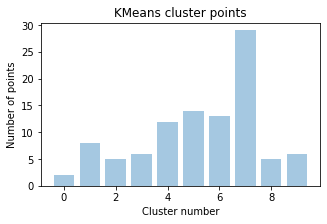

In [61]:
# visually how points or reviews are distributed across 10 clusters
plt.bar([x for x in range(10)], df_places.groupby(['tf_label'])['cleaned_text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

# Average Word to Vector

In [62]:
i=0
list_of_sent=[]
for sent in df_places['cleaned_text'].values:
    list_of_sent.append(sent.split())
print(df_places['cleaned_text'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

swamp mile downtown island city canal site day commercialism money point thing kalakaua avenue place beach strip sand place surf lesson outrigger canoe ride pedestrian walkway edge garden refuge frenzy centre spot
*****************************************************************
['swamp', 'mile', 'downtown', 'island', 'city', 'canal', 'site', 'day', 'commercialism', 'money', 'point', 'thing', 'kalakaua', 'avenue', 'place', 'beach', 'strip', 'sand', 'place', 'surf', 'lesson', 'outrigger', 'canoe', 'ride', 'pedestrian', 'walkway', 'edge', 'garden', 'refuge', 'frenzy', 'centre', 'spot']


In [63]:
# removing html tags and apostrophes if present.
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [64]:
i=0
list_of_sent_train=[]
for sent in df_places['cleaned_text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent_train.append(filtered_sentence)

In [65]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train, workers=4)

ModuleNotFoundError: No module named 'gensim'

In [ ]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

In [ ]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

In [ ]:
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list

optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss.
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [ ]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

In [ ]:
# Giving Labels/assigning a cluster to each point/text
df_places['avg_label'] = model2.labels_
df_places.head(2)

In [ ]:
df_places.groupby(['avg_label'])['cleaned_text'].count()

In [ ]:
# visually how points or reviews are distributed across 10 clusters
plt.bar([x for x in range(9)], df_places.groupby(['avg_label'])['cleaned_text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()



#----------------------------------------------------#
# OLD

In [ ]:
tfid_vectorizer = TfidfVectorizer(stop_words='english')
#tfid_word_doc_matrix = tfid_vectorizer.fit_transform(df_places['non_NE_nouns'])
tfid_word_doc_matrix = tfid_vectorizer.fit_transform(df_places['non_NE_nouns'])
tfid_vectorizer.get_feature_names_out()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X = tfid_word_doc_matrix.toarray()
cluster = AgglomerativeClustering(n_clusters=48, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

print(cluster.labels_)
# %%
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

# %%
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))


# %%
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
# %%